In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/spiral.csv')


X = data.iloc[:, :2].values  # Input features
y = data.iloc[:, 2].values  # Labels

# Data normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std


data

,x1,x2,y
0,0.371268,-0.012075,0
1,0.281894,0.044798,0
2,0.508074,-0.438310,1
3,0.362393,0.863403,1
4,0.381005,0.062693,0
...,...,...,...
195,-0.287156,-0.378036,1
196,-1.253208,0.364238,0
197,-1.166070,0.211895,0
198,-0.581621,0.760125,1


Iteration 0: Loss 3.884764113820413
Iteration 100: Loss 3.230869904809871
Iteration 200: Loss 1.0595920892888142
Reduced learning rate to 0.09000000000000001
Iteration 300: Loss 0.8374090414205689
Reduced learning rate to 0.08100000000000002
Iteration 400: Loss 0.6372897295630446
Reduced learning rate to 0.07290000000000002
Iteration 500: Loss 0.48926376291627366
Iteration 600: Loss 0.4124474292778114
Iteration 700: Loss 0.28954671006548166
Iteration 800: Loss 0.18207388263021537
Iteration 900: Loss 0.3218013720136078
Iteration 1000: Loss 0.23575658785390896
Reduced learning rate to 0.06561000000000002
Iteration 1100: Loss 0.10790941874515703
Iteration 1200: Loss 0.27828018171802943
Reduced learning rate to 0.05904900000000002
Iteration 1300: Loss 0.14847562276162624
Reduced learning rate to 0.05314410000000002
Iteration 1400: Loss 0.27104861389540497
Iteration 1500: Loss 0.21078692767661256
Reduced learning rate to 0.04782969000000002
Iteration 1600: Loss 0.07219056081388397
Reduced l

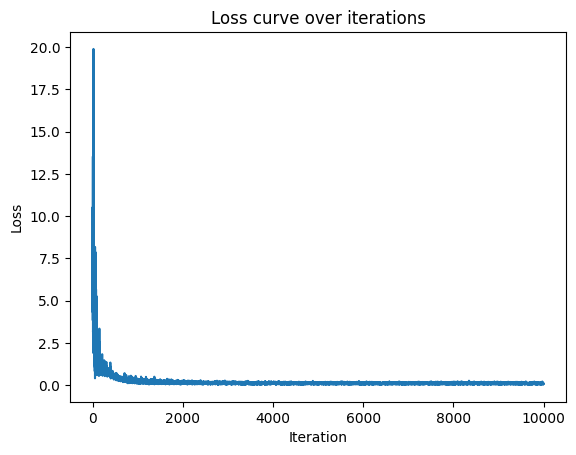

In [ ]:
# Initialize parameters
np.random.seed(42)
input_size = X.shape[1]  # 2
hidden_size = 1000
output_size = 2

W = np.random.randn(hidden_size, input_size) * np.sqrt(2. / input_size)
b = np.zeros((hidden_size, 1))
W_prime = np.random.randn(output_size, hidden_size) * np.sqrt(2. / hidden_size)
b_prime = np.zeros((output_size, 1))


def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def compute_loss(y_true, y_pred):
    n = y_true.shape[0]
    y_true_one_hot = np.zeros((n, output_size))
    y_true_one_hot[np.arange(n), y_true] = 1
    log_likelihood = -np.log(y_pred) * y_true_one_hot
    loss = np.sum(log_likelihood) / n
    return loss

# Gradient descent parameters
initial_learning_rate = 0.1
learning_rate = initial_learning_rate
learning_rate_decay = 0.9
num_iterations = 10000
batch_size = 20
patience = 1000
min_delta = 0.0001
losses = []
best_loss = np.inf
iterations_since_improvement = 0

# Initialize the learning rate
learning_rate = initial_learning_rate

for i in range(num_iterations):
    # Randomly shuffle the data at the beginning of each epoch
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # Mini-batch iteration
    for start_idx in range(0, X.shape[0], batch_size):
        # Create a mini-batch of data
        end_idx = min(start_idx + batch_size, X.shape[0])
        X_batch = X_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        # Forward pass on the mini-batch
        z = np.dot(W, X_batch.T) + b
        a = relu(z)
        y_hat = np.dot(W_prime, a) + b_prime
        y_pred = softmax(y_hat)

        # Compute loss for the mini-batch
        loss = compute_loss(y_batch, y_pred.T)

        # Backward pass (compute gradients on the mini-batch)
        delta1 = y_pred - np.eye(output_size)[y_batch].T
        delta2_t = np.dot(W_prime.T, delta1) * relu_derivative(z)

        db_prime = np.sum(delta1, axis=1, keepdims=True) / batch_size
        dW_prime = np.dot(delta1, a.T) / batch_size
        db = np.sum(delta2_t, axis=1, keepdims=True) / batch_size
        dW = np.dot(delta2_t, X_batch) / batch_size

        # Update the parameters
        W -= learning_rate * dW
        b -= learning_rate * db
        W_prime -= learning_rate * dW_prime
        b_prime -= learning_rate * db_prime

        if loss + min_delta < best_loss:
            best_loss = loss
            iterations_since_improvement = 0
        else:
            iterations_since_improvement += 1
            if iterations_since_improvement >= patience:
                learning_rate *= learning_rate_decay
                iterations_since_improvement = 0
                print(f"Reduced learning rate to {learning_rate}")

      # Print the loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Loss {loss}")


    # Store the loss from the last mini-batch of this epoch
    losses.append(loss)




# Plot loss curve
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss curve over iterations')
plt.show()

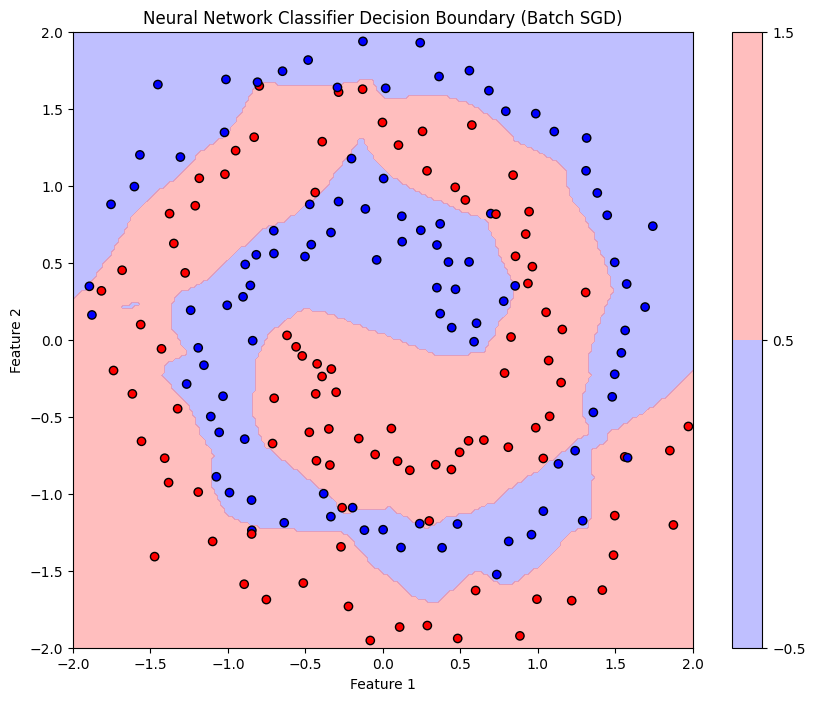

In [ ]:
x1_range = np.linspace(-2, 2, 200)
x2_range = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)
grid = np.column_stack([X1.ravel(), X2.ravel()])

# Normalize the grid using the same statistics as the training data
# grid_normalized = (grid - X_mean) / X_std

# Forward pass through the network for the normalized grid
Z_grid = relu(np.dot(grid, W.T) + b.T)
Y_hat_grid = softmax(np.dot(Z_grid, W_prime.T) + b_prime.T)

# Determine the predicted class based on the two components of y
Y_pred = np.where(Y_hat_grid[:, 0] >= Y_hat_grid[:, 1], 0, 1)

# Reshape the predicted classes back into the grid shape
Z = Y_pred.reshape(X1.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, Z, alpha=0.5, levels=np.arange(3) - 0.5, cmap='bwr')
plt.colorbar()
# Scatter plot of the actual data points (normalized for plotting)
plt.scatter(X[:, 0] , X[:, 1] , c=y, edgecolor='k', cmap='bwr')
plt.title('Neural Network Classifier Decision Boundary (Batch SGD)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-2,2)
plt.xlim(-2,2)

plt.show()
